## Import Packages

- `pandas` - for work with large data structures
- `numpy` - for mathematical,and numerical calculations
- `scikit-learn(sklearn)` - all important machine learning (and statistical) algorithms used for training the models
- `time` and `datetime` - datetime - ability to get current time for logs
- `math` - basic mathematical functions (as logarithm etc.))
- `scipy` - for metrics evaluation calculations
- `matplotlib` - for plotting the charts
- `seaborn` - for statistical visualisations

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import datetime
import time

import time
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import os
# os.chdir('/muhammad.aprilian')

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
data = pd.read_excel('dataset_all.xlsx',index_col='Country')
print('Data loaded on', datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

Data loaded on 2022-11-10 15:48:54


In [ ]:
#Remove rows with duplicated index
data=data[~data.index.duplicated(keep='first')]

#Remove unnecessary row
data = data[data.index.notna()]

#Column name to lowercase
data.columns = data.columns.str.lower()

In [ ]:
display(data.head())
print(data.columns)

,country_code,current health expenditure (% of gdp),"hospital beds (per 1,000 people)","nurses and midwives (per 1,000 people)",uhc service coverage index,land area_km,lifeexp(years),poverty,unemployment_rate,gini_index,...,ghs score,2) early detection & reporting for epidemics of potential int'l concern,3) rapid response to and mitigation of the spread of an epidemic,4) sufficient & robust health sector to treat the sick & protect health workers,"5) commitments to improving national capacity, financing and adherence to norms",6) overall risk environment and country vulnerability to biological threats,refugee,history_case,lts,error_count
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,13.242202,0.390000,0.446100,37.0,652860.0,62.879,54.5,13.28,29.4,...,28.8,20.6,24.5,23.0,60.9,31.6,66949.0,313.0,0.068841,0.0
Africa Eastern and Southern,AFE,6.266386,0.911871,0.915677,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,18.0
Africa Western and Central,AFW,3.366100,1.474776,1.149448,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,18.0
Albania,ALB,5.232072,2.890000,5.088000,62.0,27400.0,76.833,14.3,11.82,33.2,...,45.0,40.0,38.1,47.4,52.1,50.6,109.0,0.0,0.956250,0.0
Algeria,DZA,6.243371,1.900000,1.547700,75.0,2381740.0,77.129,5.5,12.70,27.6,...,26.2,12.6,25.6,15.0,38.9,49.7,97890.0,0.0,0.085702,0.0


Index(['country_code', 'current health expenditure (% of gdp)',
       'hospital beds (per 1,000 people)',
       'nurses and midwives (per 1,000 people)', 'uhc service coverage index',
       'land area_km', 'lifeexp(years)', 'poverty', 'unemployment_rate',
       'gini_index', 'gdp/cap(us$)', 'population', 'developed?',
       'migration_2020', 'ghs score',
       '2) early detection & reporting for epidemics of potential int'l concern',
       '3) rapid response to and mitigation of the spread of an epidemic',
       '4) sufficient & robust health sector to treat the sick & protect health workers',
       '5) commitments to improving national capacity, financing and adherence to norms',
       '6) overall risk environment and country vulnerability to biological threats',
       'refugee', 'history_case', 'lts', 'error_count'],
      dtype='object')


# Metadata Definition

In [ ]:
## listing nama kolom per member

edo = [
       'current health expenditure (% of gdp)',
       'hospital beds (per 1,000 people)',
       'nurses and midwives (per 1,000 people)', 
       'uhc service coverage index',
       'lifeexp(years)'
       ]
insan = ['ghs score']
puar = ['gini_index','gdp/cap(us$)']
rafif = ['history_case','lts']
rahman = ['migration_2020']
cols_member = edo+insan+puar+rafif+rahman

## Data exploration

In [ ]:
# Check dataset shape
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 269
Number of columns: 24


In [ ]:
train = data[edo+insan+puar+rafif+rahman]

# initial check on dataset
## statistical summary?
## is there missing data?
## is there outlier data?

Showing the statistical summary, could help us on preliminary investigation on dataset

In [ ]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
current health expenditure (% of gdp),238.0,6.498326,2.971287,1.525117,4.463254,5.812963,7.890663,2.396181e+01
"hospital beds (per 1,000 people)",248.0,3.018995,2.679014,0.100000,1.212575,2.299286,4.200000,1.868000e+01
"nurses and midwives (per 1,000 people)",239.0,4.287489,3.955407,0.111900,1.303050,3.094791,6.082500,2.016090e+01
uhc service coverage index,204.0,64.711642,15.341797,27.000000,52.750000,68.906012,77.000000,8.900000e+01
lifeexp(years),140.0,72.291936,7.907563,52.997000,65.858250,73.456500,78.271000,8.482000e+01
ghs score,193.0,39.069430,13.615580,16.000000,28.800000,35.000000,48.700000,7.590000e+01
gini_index,140.0,37.674286,7.582813,24.600000,32.675000,36.050000,42.150000,6.300000e+01
gdp/cap(us$),140.0,21781.064286,22285.818890,760.000000,5184.750000,13162.000000,32789.250000,1.180010e+05
history_case,269.0,12633.884758,134396.190493,0.000000,0.000000,0.000000,2.000000,2.182229e+06
lts,188.0,4.629214,4.555265,0.000000,0.307116,2.852386,9.102142,1.200000e+01


*Statistical summary metrics*

Categorical
- `count` - number of your rows/data point
- `unique` - number of unique values
- `top` - most appear values

Continuous
- `freq` - number of data point to the corresponding top values
- `mean`- mean/average
- `std` - standard deviation
- `min` - minimum value
- `25%` - Quartile-1(Q1)
- `50%` - Median
- `75%` - Quartile-3(Q3)
- `max` - maximum value

### Visualize the data

Showing also histogram to get more intuition about your data distribution

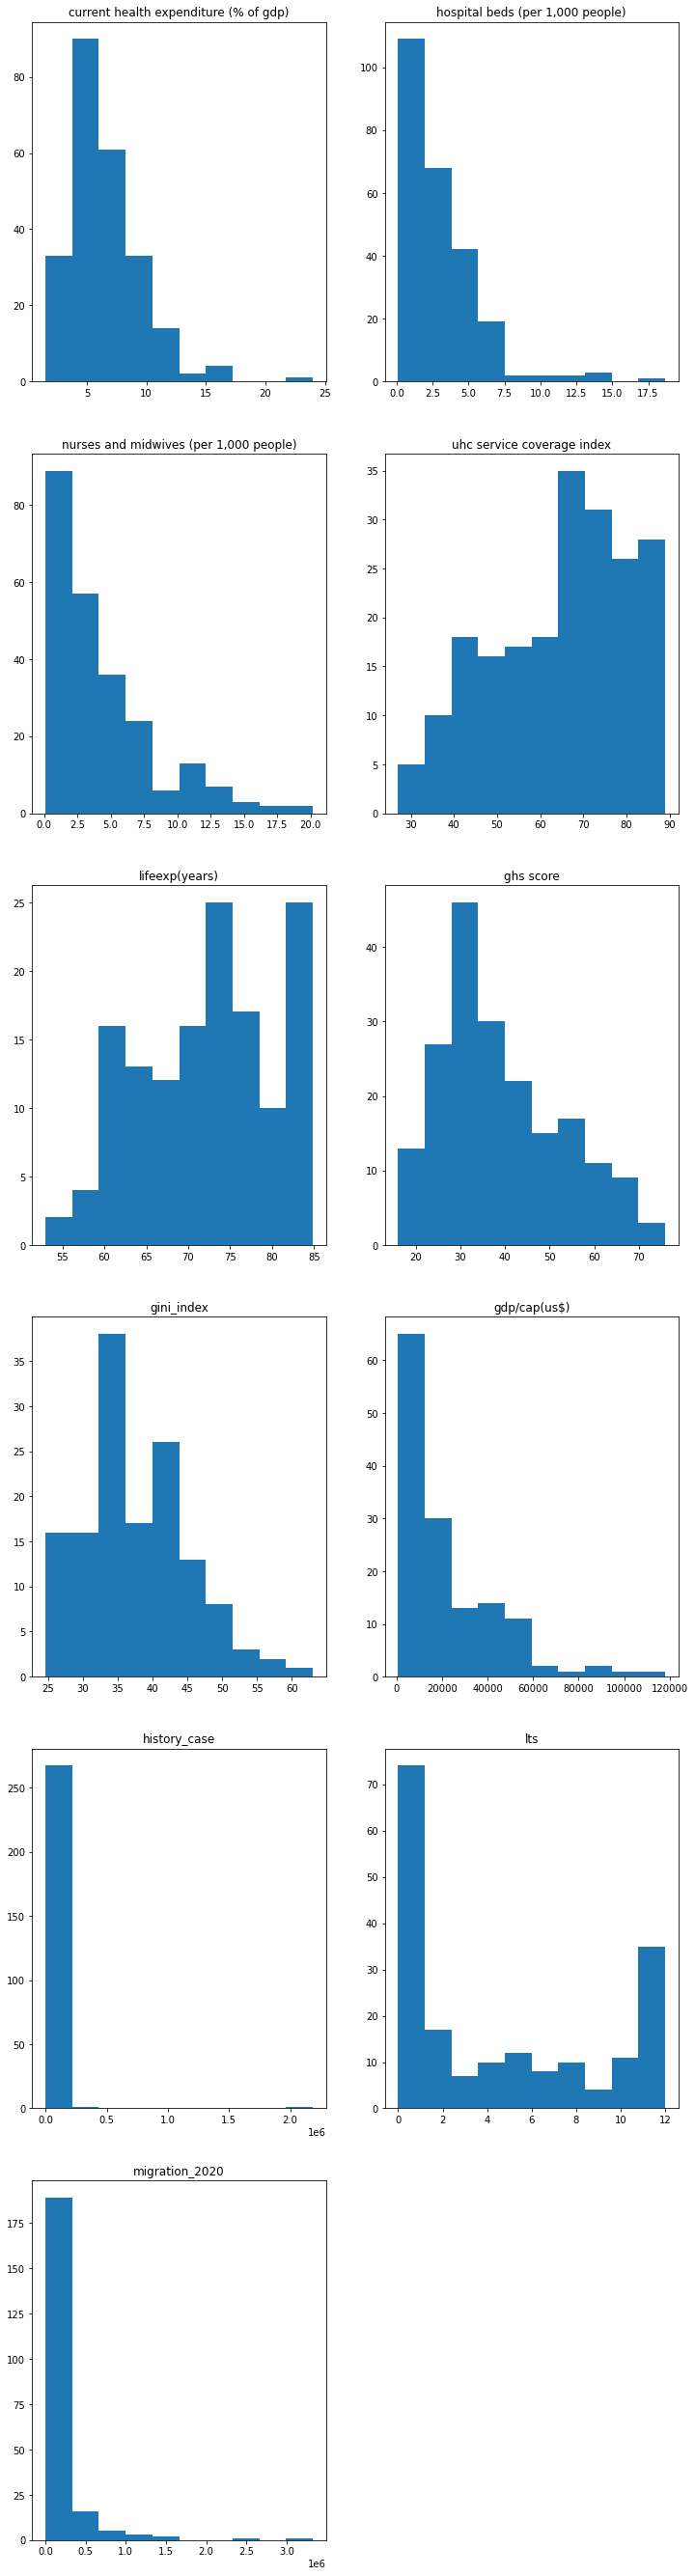

In [ ]:
cols = list(train.columns)

plt.figure(figsize=(12,48))
for i,col in enumerate(cols, start = 1):
    plt.subplot(6,2,i)
    plt.hist(train[col])
    plt.title(col)
plt.show()

In [ ]:
# # Showing relationship between features
# sns.pairplot(train[cols])
# plt.show()

**Investigate columns with null values**

In [ ]:
missingCol = train.isnull().sum()
print("There are", len(missingCol[missingCol != 0]),"columns with missing value")

There are 10 columns with missing value


**Outlier Detection with Inter Quartile method(IQR)**

In [ ]:
## create functions
def outlier_thresholds(df, col):
    """ function to estimate non-outlier to outlier boundaries
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    return low_limit, up_limit


def cnt_outliers(df, cols_pred, plot=False):
    """ function to estimate and plot number of outlier case
    """
    col_names = []
    for col in cols_pred:
        low_lim, up_lim = outlier_thresholds(df, col)
        if df[(df[col] > up_lim) | (df[col] < low_lim)].any(axis=None):
            number_of_outliers = df[(df[col] > up_lim) | (df[col] < low_lim)].shape[0]
            print(col, "'s outliers count:", number_of_outliers)
            col_names.append(col)
            if plot:
                sns.boxplot(x=df[col])
                plt.show()
    return col_names

current health expenditure (% of gdp) 's outliers count: 6


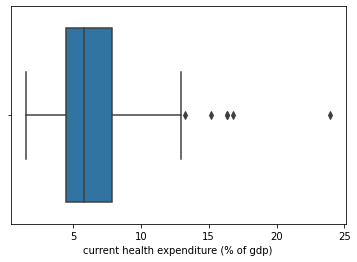

hospital beds (per 1,000 people) 's outliers count: 8


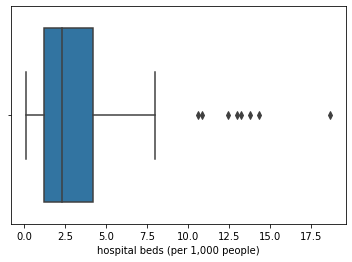

nurses and midwives (per 1,000 people) 's outliers count: 9


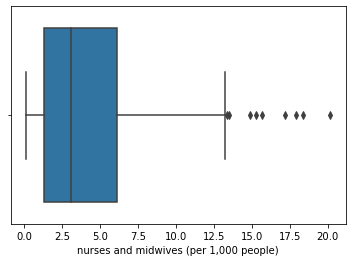

gini_index 's outliers count: 3


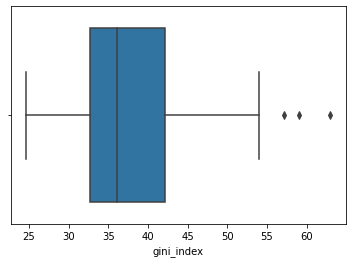

gdp/cap(us$) 's outliers count: 4


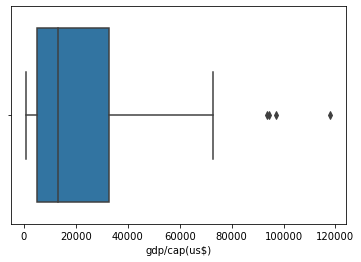

history_case 's outliers count: 63


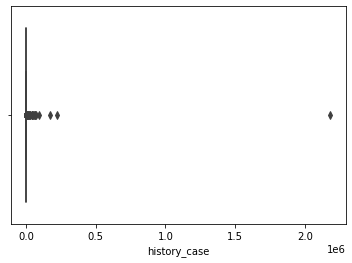

migration_2020 's outliers count: 25


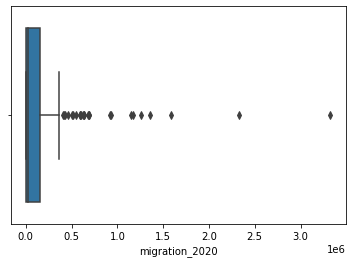

In [ ]:
## create an instance to detect outlier
cols_num = train.select_dtypes(include='number')
a = cnt_outliers(train, cols_num, plot=True)

**Correlations**

Show correlation matrix of all predictor

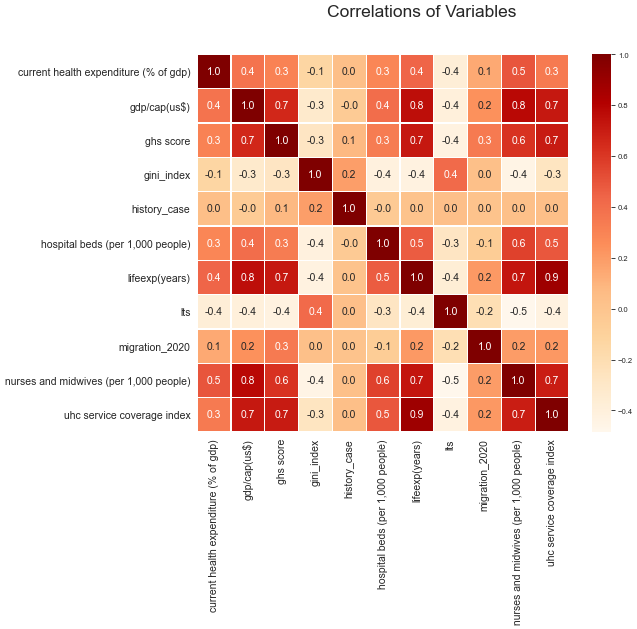

In [ ]:
cormat = train[sorted(cols_member)].corr()

plt.rcParams.update({'font.size': 15})
sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True

fig, ax = plt.subplots(figsize=(12,10), dpi=50)
fig.suptitle('Correlations of Variables',fontsize=25)
sns.heatmap(cormat, ax=ax, annot=True, fmt="0.1f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()
plt.clf();plt.close()

In [ ]:
max_ok_correlation = 0.5

# find highest pairwise correlation (correlation greater than .. in absolute value)
hicors = []
for i in range(0,len(cormat)):
    for j in range(0,len(cormat)):
        if ((cormat.iloc[i][j] > max_ok_correlation or cormat.iloc[i][j] < -max_ok_correlation) and i < j):
            hicors.append((i,j,cormat.index[i],cormat.index[j],cormat.iloc[i][j],abs(cormat.iloc[i][j])))
hicors.sort(key= lambda x: x[5], reverse=True)

hicors2 = pd.DataFrame(list(zip(*list(zip(*hicors))[2:5])), columns = ['predictor_1', 'predictor_2', 'corr'])

# print list of highest correlations
hicors2

,predictor_1,predictor_2,corr
0,lifeexp(years),uhc service coverage index,0.888925
1,gdp/cap(us$),"nurses and midwives (per 1,000 people)",0.784182
2,gdp/cap(us$),lifeexp(years),0.756495
3,lifeexp(years),"nurses and midwives (per 1,000 people)",0.730117
4,ghs score,lifeexp(years),0.721138
5,gdp/cap(us$),uhc service coverage index,0.718703
6,ghs score,uhc service coverage index,0.705023
7,"nurses and midwives (per 1,000 people)",uhc service coverage index,0.701457
8,gdp/cap(us$),ghs score,0.663212
9,ghs score,"nurses and midwives (per 1,000 people)",0.620451


## Data Preprocessing

**Delete rows with null values**

In [ ]:
train = train.dropna(axis=0)

### Numerical - Standardization

Scaling is done on numerical predictors to avoid the outlier/bigger magnitude value effects on the model. Standardization is one of the methods for scaling, it transformed all the values by centering its mean at 0 then scales the variance at 1. 

The pros of this method is it keeping the shape of the predictor's original distribution

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(train)

train_sd = scaler.transform(train)

In [ ]:
cols_sd = [i+'_sd' for i in cols_member]
edo_sd = [i+'_sd' for i in edo]
insan_sd = [i+'_sd' for i in insan]
puar_sd = [i+'_sd' for i in puar]
rafif_sd = [i+'_sd' for i in rafif]
rahman_sd = [i+'_sd' for i in rahman]

train[cols_sd] = train_sd
train[cols_sd].head()

,current health expenditure (% of gdp)_sd,"hospital beds (per 1,000 people)_sd","nurses and midwives (per 1,000 people)_sd",uhc service coverage index_sd,lifeexp(years)_sd,ghs score_sd,gini_index_sd,gdp/cap(us$)_sd,history_case_sd,lts_sd,migration_2020_sd
Country,,,,,,,,,,,
Afghanistan,2.537562,-1.006517,-0.958671,-1.824905,-1.194646,-0.982245,-1.095108,-0.873232,-0.12776,-0.905212,-0.424881
Albania,-0.512758,0.016770,0.108446,-0.245096,0.576331,0.196886,-0.592175,-0.340585,-0.12945,-0.701480,-0.494654
Algeria,-0.127648,-0.388452,-0.705427,0.576405,0.613897,-1.171488,-1.333339,-0.480457,-0.12945,-0.901341,-0.471396
Angola,-1.540449,-0.838698,-0.967545,-1.698521,-1.315215,-0.960409,1.803373,-0.668694,-0.12945,0.206593,-0.252776
Argentina,1.116337,0.876330,-0.463608,0.450020,0.478733,0.881072,0.691627,-0.046387,-0.12505,-0.742070,0.254238


## PCA:

## reduction on Edo's predictor

In [ ]:
pca = PCA(n_components = 1)
train['edo_pca'] = pca.fit_transform(train[edo_sd])

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

train['edo_pca'].head()
# plt.show()

Country
Afghanistan   -1.391360
Albania        0.026686
Algeria        0.057978
Angola        -2.847058
Argentina      0.974082
Name: edo_pca, dtype: float64

## reduction in Puar's predictor

In [ ]:
pca = PCA(n_components = 1)
train['puar_pca'] = pca.fit_transform(train[puar_sd])

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

train['puar_pca'].head()
# plt.show()

Country
Afghanistan    0.156890
Albania        0.177901
Algeria        0.603079
Angola        -1.748015
Argentina     -0.521854
Name: puar_pca, dtype: float64

# Part 1: K-Means Clustering

<b>Parameters:</b>

`n_clusters`: int, optional, default: 8. <br>
The number of clusters

`init`: {‘k-means++’, ‘random’ or an ndarray}.  <br>
Method for initialization, defaults to ‘k-means++’:

`n_init` : int, default: 10 <br>
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

`max_iter` : int, default: 300 <br>
Maximum number of iterations of the k-means algorithm for a single run.

`precompute_distances` : {‘auto’, True, False} <br>
Precompute distances (faster but takes more memory).

`random_state` : int, RandomState instance or None (default) <br>
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

## Model Fitting

<b>The number of clusters (Experimenting different k):</b>
* Clusterings of the dataset with diﬀerent numbers of clusters 
* More clusters means lower inertia 
* What is the best number of clusters?

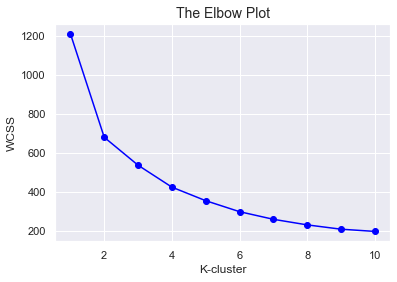

In [ ]:
k_cluster = [1,2,3,4,5,6,7,8,9,10]
wcss = []

for K in k_cluster:
    kmean = KMeans(n_clusters=K)
    kmean.fit(train[['edo_pca'] + ['puar_pca'] + insan_sd + rahman_sd + rafif_sd])
    wcss.append(kmean.inertia_)

plt.plot(k_cluster, wcss, color='blue', marker='o')
plt.xlabel('K-cluster')
plt.ylabel('WCSS')
plt.title('The Elbow Plot', fontsize=14)
plt.show()

### Create segment

In [ ]:
# Defining the model
model = KMeans(n_clusters=5,init='k-means++',random_state=42)

# Fitting the model
model.fit(train[['edo_pca'] + ['puar_pca'] + insan_sd + rahman_sd + rafif_sd])

# create new column to store the prediction
train['segment'] = model.predict(train[['edo_pca'] + ['puar_pca'] + insan_sd + rahman_sd + rafif_sd])

### evaluate cluster

The question is which k is optimal? we can check the *inertia* or *Within-Cluster-Sum-of-Squared(WCSS)* distances of samples to their closest cluster center. The small inertia value shows better clustering.

<b>Inertia measures clustering quality:</b>
* Measures how spread out the clusters are (lower is better) 
* Distance from each sample to centroid of its cluster 
* After fit(), available as attribute inertia_ 
* k-means attempts to minimize the inertia when choosing clusters

In [ ]:
print('wcss model 1:',model.inertia_)
print('wcss model 2:',model.inertia_)

wcss model 1: 357.268690529042
wcss model 2: 357.268690529042


In [ ]:
train.head()

,current health expenditure (% of gdp),"hospital beds (per 1,000 people)","nurses and midwives (per 1,000 people)",uhc service coverage index,lifeexp(years),ghs score,gini_index,gdp/cap(us$),history_case,lts,...,ghs score_sd,gini_index_sd,gdp/cap(us$)_sd,history_case_sd,lts_sd,migration_2020_sd,edo_segment,edo_pca,puar_pca,segment
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13.242202,0.39,0.4461,37.0,62.879,28.8,29.4,2390.0,313.0,0.068841,...,-0.982245,-1.095108,-0.873232,-0.12776,-0.905212,-0.424881,0,-1.391360,0.156890,4
Albania,5.232072,2.89,5.0880,62.0,76.833,45.0,33.2,14218.0,0.0,0.956250,...,0.196886,-0.592175,-0.340585,-0.12945,-0.701480,-0.494654,3,0.026686,0.177901,2
Algeria,6.243371,1.90,1.5477,75.0,77.129,26.2,27.6,11112.0,0.0,0.085702,...,-1.171488,-1.333339,-0.480457,-0.12945,-0.901341,-0.471396,3,0.057978,0.603079,2
Angola,2.533360,0.80,0.4075,39.0,61.929,29.1,51.3,6932.0,0.0,4.911599,...,-0.960409,1.803373,-0.668694,-0.12945,0.206593,-0.252776,0,-2.847058,-1.748015,4
Argentina,9.510071,4.99,2.5996,73.0,76.064,54.4,42.9,20751.0,815.0,0.779448,...,0.881072,0.691627,-0.046387,-0.12505,-0.742070,0.254238,1,0.974082,-0.521854,2


In [ ]:
train.loc[train['segment']==0].index

Index(['Iran, Islamic Rep.', 'Jordan', 'Saudi Arabia', 'Turkiye',
       'United Arab Emirates', 'United States'],
      dtype='object', name='Country')

In [ ]:
train.loc[train['segment']==1].index

Index(['Armenia', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Canada',
       'Chile', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype='object', name='Country')

In [ ]:
train.loc[train['segment']==2].index

Index(['Albania', 'Algeria', 'Argentina', 'Azerbaijan', 'Bhutan',
       'Bosnia and Herzegovina', 'Bulgaria', 'China', 'Colombia', 'Costa Rica',
       'Dominica', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Georgia',
       'Kazakhstan', 'Lebanon', 'Malaysia', 'Mauritius', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Romania', 'Russian Federation', 'Serbia', 'South Africa',
       'Sri Lanka', 'Tajikistan', 'Thailand', 'Tunisia', 'Turkmenistan',
       'Ukraine', 'Uruguay', 'Uzbekistan', 'Vietnam'],
      dtype='object', name='Country')

In [ ]:
train.loc[train['segment']==3].index

Index(['Brazil'], dtype='object', name='Country')

In [ ]:
train.loc[train['segment']==4].index

Index(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chad',
       'Congo, Rep.', 'Cote d'Ivoire', 'Dominican Republic',
       'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq',
       'Jamaica', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Nepal', 'Niger',
       'Nigeria', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
       'Venezuela, RB', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country')

### Visualize the data

If we the plot  `Annual Income` vs `Speding Score` data with the prediction we can clearly see the clustering

Text(0.5, 1.0, 'Sub Segmentation')

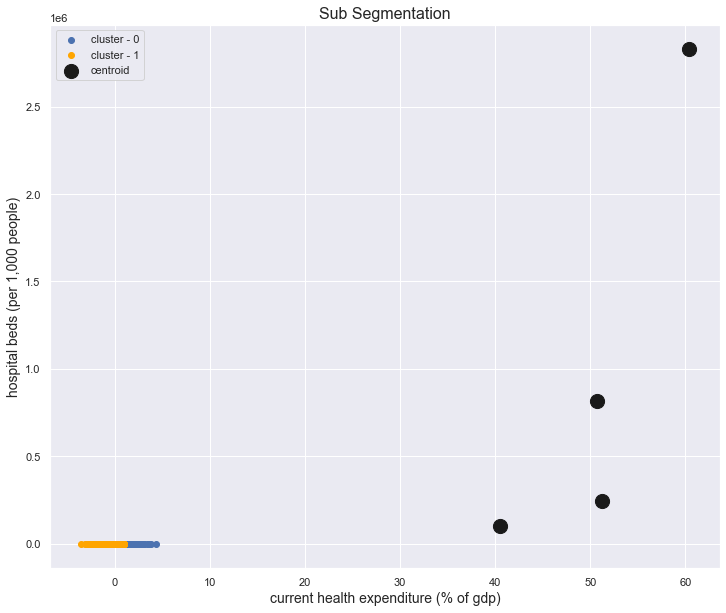

In [ ]:
xs = train.loc[:,['edo_pca','segment']] 
ys = train.loc[:,['puar_pca','segment']]

plt.figure(figsize=(12,10))

#plot cluster
plt.scatter(xs[xs['segment']==0], ys[ys['segment']==0], c='b', label='cluster - 0')
plt.scatter(xs[xs['segment']==1], ys[ys['segment']==1], c='orange', label='cluster - 1')
# plt.scatter(xs[xs['segment']==2], ys[ys['segment']==2], c='g', label='cluster - 2')
# plt.scatter(xs[xs['segment']==3], ys[ys['segment']==3], c='r', label='cluster - 3')
# plt.scatter(xs[xs['cluster']==4], ys[ys['cluster']==4], c='purple', label='cluster - 4')
#plot centroid
plt.scatter(smodel_edo.cluster_centers_[:,2], smodel_edo.cluster_centers_[:, 3], c='k',label='centroid' ,s=200)
              
plt.xlabel('current health expenditure (% of gdp)',fontsize=14)
plt.ylabel('hospital beds (per 1,000 people)',fontsize=14)
plt.legend()
plt.title('Sub Segmentation',fontsize=16)

In [ ]:
train.to_excel('dataset_segment.xlsx')